In [47]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
# Read in the file
file = Path("../Data/us_videos_cleaned_2.csv")
us_videos_df = pd.read_csv(file)
us_videos_df.head()

,video_id,publish_time,trending_date,publish_to_trend,days_trending,title,channel_title,category_id,category_name,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tags_count
0,2kyS6SvSYSE,2017-11-13 17:13:01,2017-11-14,0,7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,SHANtell martin,748374,57527,2966,15954,False,False,False,1
1,1ZAPwfrtAFY,2017-11-13 07:30:00,2017-11-14,0,7,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,4
2,5qpjK5DgCt4,2017-11-12 19:05:24,2017-11-14,1,7,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,23
3,puqaWrEC7tY,2017-11-13 11:00:04,2017-11-14,0,7,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,27
4,d380meD0W0M,2017-11-12 18:01:41,2017-11-14,1,6,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,14


<AxesSubplot:>

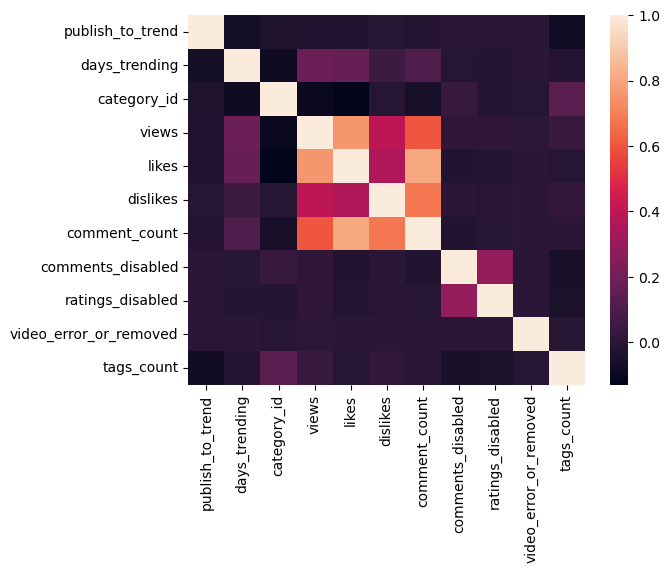

In [26]:
# Use seaborn to create heatmap for correlations between features

sns.heatmap(us_videos_df.corr())

# Use post_to_trend as target to see if the model can predict the day(s) for the video from publish to trending.

In [27]:
# instantiate model
model = LinearRegression()

In [42]:
# Use LabelEncoder to encode object and boolean values
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(us_videos_df[['title', 'channel_title', 'category_name']].values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names()

/Users/nicky/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
# Drop Unnecessary columns
us_videos_df = us_videos_df.drop(columns=['video_id', 'publish_time', 'trending_date','days_trending', 'category_id', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'])
us_videos_df

,publish_to_trend,title,channel_title,category_name,views,likes,dislikes,comment_count,tags_count
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,1
1,0,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2418783,97185,6146,12703,4
2,1,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,3191434,146033,5339,8181,23
3,0,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,343168,10172,666,2146,27
4,1,I Dare You: GOING BALD!?,nigahiga,Entertainment,2095731,132235,1989,17518,14
...,...,...,...,...,...,...,...,...,...
6346,1,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,Howto & Style,607422,26166,895,3517,21
6347,0,First Take reacts: Kyrie Irving says contract ...,ESPN,Sports,812832,7701,320,2505,31
6348,0,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,Entertainment,864189,18811,399,1074,28
6349,1,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,Howto & Style,540149,14206,693,1211,26


In [73]:
us_videos_df

,publish_to_trend,title,channel_title,category_name,views,likes,dislikes,comment_count,tags_count
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,1
1,0,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2418783,97185,6146,12703,4
2,1,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,3191434,146033,5339,8181,23
3,0,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,343168,10172,666,2146,27
4,1,I Dare You: GOING BALD!?,nigahiga,Entertainment,2095731,132235,1989,17518,14
...,...,...,...,...,...,...,...,...,...
6346,1,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,Howto & Style,607422,26166,895,3517,21
6347,0,First Take reacts: Kyrie Irving says contract ...,ESPN,Sports,812832,7701,320,2505,31
6348,0,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,Entertainment,864189,18811,399,1074,28
6349,1,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,Howto & Style,540149,14206,693,1211,26


In [94]:
# merge the dataframes
us_videos_df = us_videos_df.merge(encode_df, 
                   left_index=True, 
                   right_index=True).drop(columns = ['title', 'channel_title', 'category_name'])

In [95]:
us_videos_df

,publish_to_trend,views,likes,dislikes,comment_count,tags_count,x0_#184 Making a PCB using EasyEDA. // Review,"x0_#23 Feed The Homeless | One List, One Life",x0_#57: AM and SSB explained,"x0_#AboveTheNoise feat. Serena Williams, Neymar Jr., Cara Delevingne, Michael K. Williams, and Kris Wu",...,x0_긴박했던 상황...'판문점 귀순' CCTV·TOD 영상 공개 / YTN,x0_말차 까눌레 만들기 | 한세,x0_생후 60일 된 새끼가 사라졌다!!?,x0_영국남자 Korean Englishman,x0_한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,x0_힐링쿠킹♥ 빙글빙글 회오리젤리 만들기! - Ari Kitchen(아리키친),"x0_🍒 april favs 🍒 (music, clothes, life)",x0_🍫달콤 쌉사름~ 리얼 초콜릿 우유 만들기 Real Chocolate Milk | 한세,x0_🎃 How to make Pumpkin Pie Mistakes,"x0_😱 $1,145 iPhone Case!!"
0,0,748374,57527,2966,15954,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2418783,97185,6146,12703,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3191434,146033,5339,8181,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,343168,10172,666,2146,27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2095731,132235,1989,17518,14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,1,607422,26166,895,3517,21,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6347,0,812832,7701,320,2505,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6348,0,864189,18811,399,1074,28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6349,1,540149,14206,693,1211,26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Use StandardScaler to scale the data
scaler = StandardScaler()

# Transform the data
us_videos_scaled = scaler.fit_transform(us_videos_df)

In [99]:
# Set features and target variables
X = us_videos_df.drop(columns='publish_to_trend')
y = us_videos_df['publish_to_trend']

In [100]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [101]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [102]:
# make prediction
y_pred = model.predict(X_test)
print(y_pred)

[  37.69427104 2390.06847071   40.17405114 ...   31.88806754   14.13777011
   25.33192107]


In [103]:
print(model.coef_)
print(model.intercept_)

[-4.68087981e-07 -5.32898968e-05  1.20744429e-04 ...  0.00000000e+00
 -3.90906206e+01  0.00000000e+00]
49.216270155801396


In [107]:
# print out r2score
r2_score(y_test, y_pred)

-0.514200030674492

<AxesSubplot:>

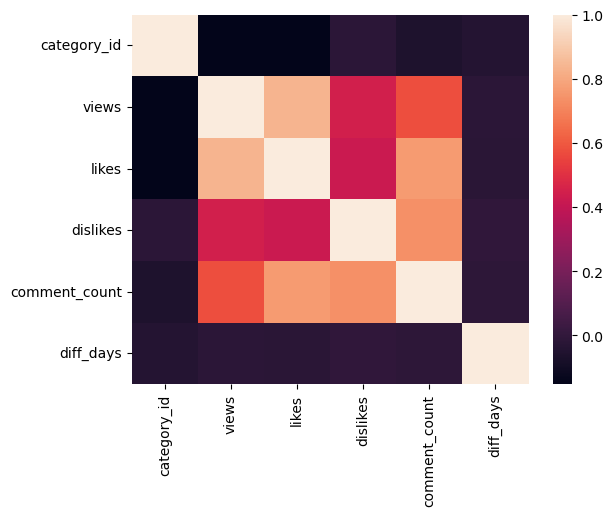

In [17]:
# Create a dataframe contains views, likes, dislikes, comment_counts, and category_id
seaborn_df = us_videos_df[['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'diff_days']]

sns.heatmap(seaborn_df.corr())